In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

%matplotlib inline
sns.set(rc={
    'figure.figsize':(15, 10)
})


df=pd.read_csv(r'D:\AAPL.csv', parse_dates=['Date'])

df.set_index('Date', inplace=True)
df=df[['Close']]

df=df.asfreq('W', method='pad')

df

,Close
Date,
2019-10-13,59.052502
2019-10-20,59.102501
2019-10-27,61.645000
2019-11-03,63.955002
2019-11-10,65.035004
...,...
2021-09-05,154.300003
2021-09-12,148.970001
2021-09-19,146.059998


## Seasonal

In [2]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

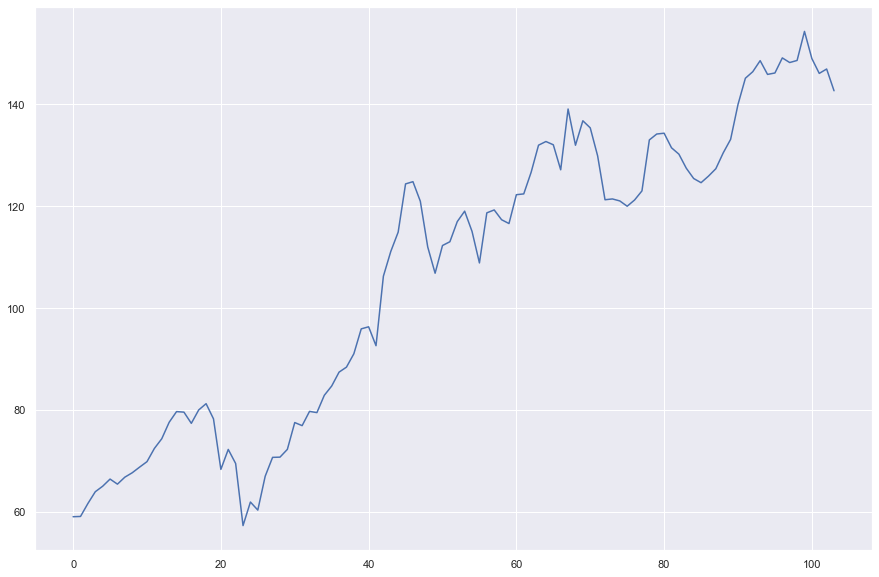

In [3]:
df.reset_index(inplace=True)
plt.plot(df['Close'])

In [4]:
mul=seasonal_decompose(df['Close'], model='multiplicative', period=1)
add=seasonal_decompose(df['Close'], model='additive', period=1)

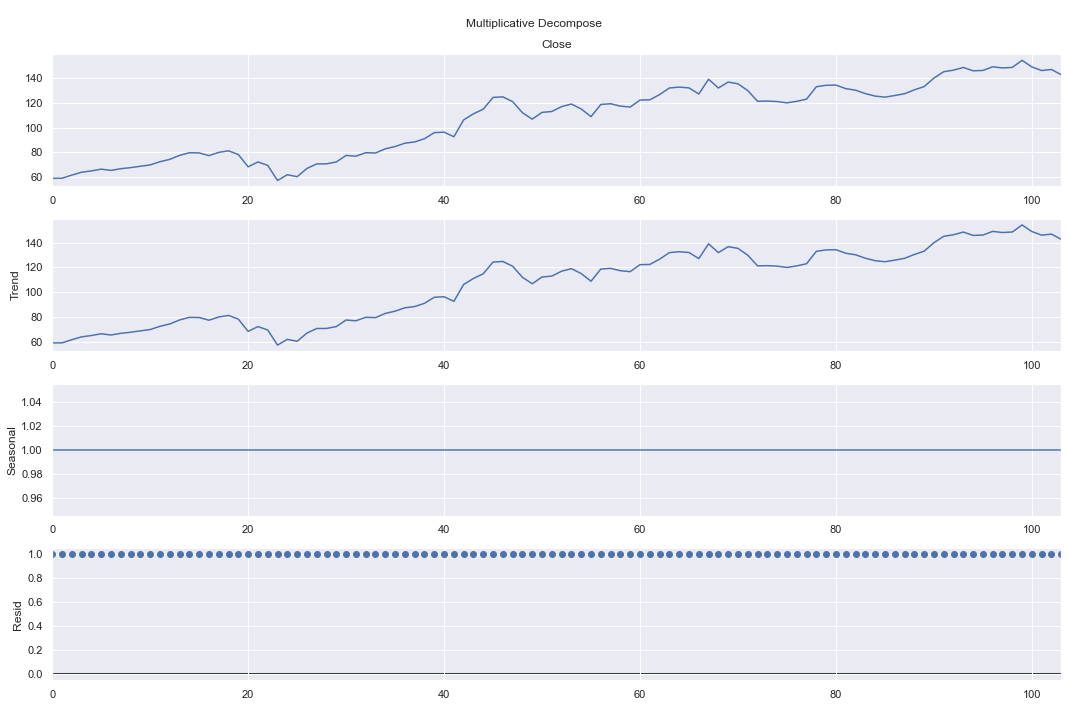

In [5]:
mul.plot().suptitle('\nMultiplicative Decompose', fontsize=12);
plt.tight_layout()
plt.show()

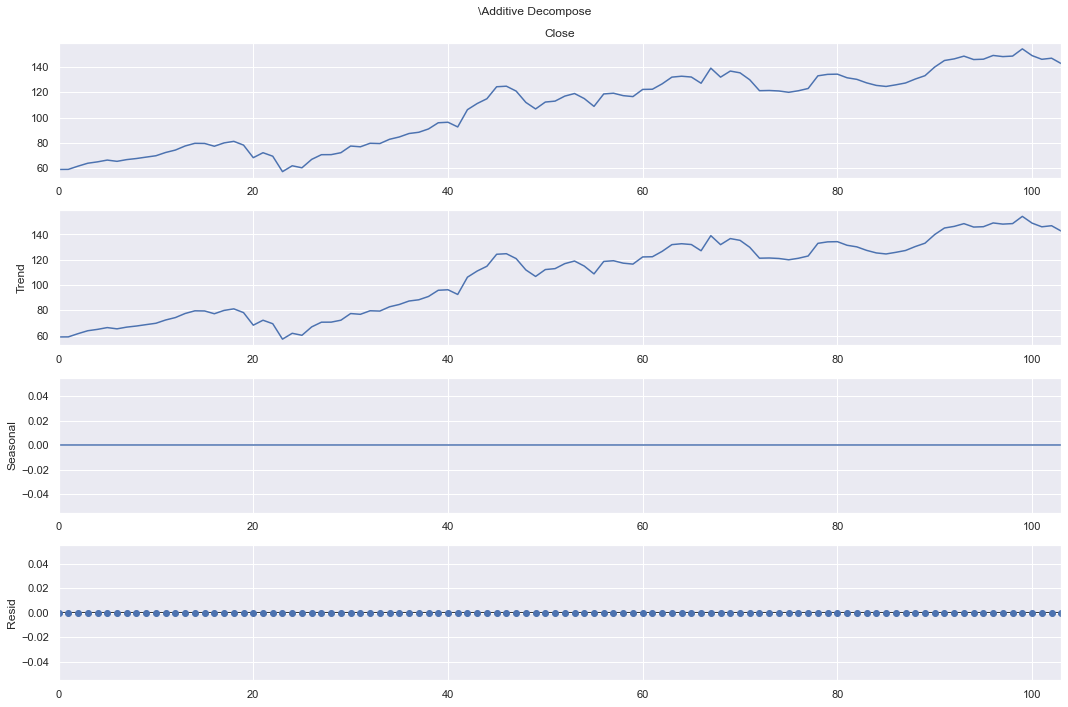

In [6]:
add.plot().suptitle('\Additive Decompose', fontsize=12);
plt.tight_layout()
plt.show()

In [7]:
mul_df=pd.concat([mul.seasonal, mul.trend, mul.resid, mul.observed], axis=1)
mul_df.columns=['seasonality', 'trend', 'residual', 'original']
mul_df.head(10)

,seasonality,trend,residual,original
0,1.0,59.052502,1.0,59.052502
1,1.0,59.102501,1.0,59.102501
2,1.0,61.645000,1.0,61.645000
3,1.0,63.955002,1.0,63.955002
4,1.0,65.035004,1.0,65.035004
5,1.0,66.440002,1.0,66.440002
6,1.0,65.445000,1.0,65.445000
7,1.0,66.812500,1.0,66.812500
8,1.0,67.677498,1.0,67.677498
9,1.0,68.787498,1.0,68.787498


In [8]:
add_df=pd.concat([add.seasonal, add.trend, add.resid, add.observed], axis=1)
add_df.columns=['seasonality', 'trend', 'residual', 'original']
add_df.head(10)

,seasonality,trend,residual,original
0,0.0,59.052502,0.0,59.052502
1,0.0,59.102501,0.0,59.102501
2,0.0,61.645000,0.0,61.645000
3,0.0,63.955002,0.0,63.955002
4,0.0,65.035004,0.0,65.035004
5,0.0,66.440002,0.0,66.440002
6,0.0,65.445000,0.0,65.445000
7,0.0,66.812500,0.0,66.812500
8,0.0,67.677498,0.0,67.677498
9,0.0,68.787498,0.0,68.787498


## Stationarity Test

In [9]:
from statsmodels.tsa.stattools import adfuller

In [10]:
def stationary_test(data):
    result=adfuller(data)
    labels=['ADF Test Statistic','p-value','Lags Used','Number of Observations Used']
    for key, value in zip(labels, result):
        print(key+' : '+str(value))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [11]:
stationary_test(df['Close'])

ADF Test Statistic : -1.138616188448227
p-value : 0.6994292113361454
Lags Used : 0
Number of Observations Used : 103
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


## Auto Regression

In [12]:
from statsmodels.tsa.stattools import acf, pacf

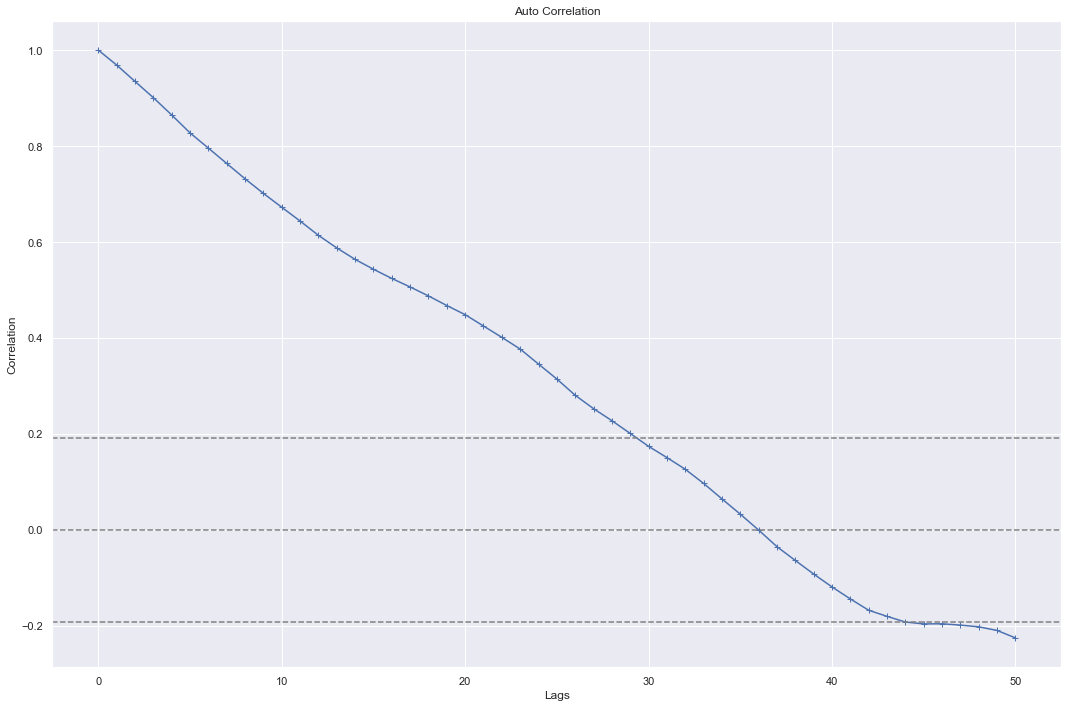

In [13]:
ACF=acf(df['Close'], nlags=50)

plt.plot(ACF, marker='+')
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df['Close'])), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(df['Close'])), linestyle='--', color='gray')
plt.title('Auto Correlation')
plt.xlabel('Lags')
plt.ylabel('Correlation')
plt.tight_layout()
plt.show()

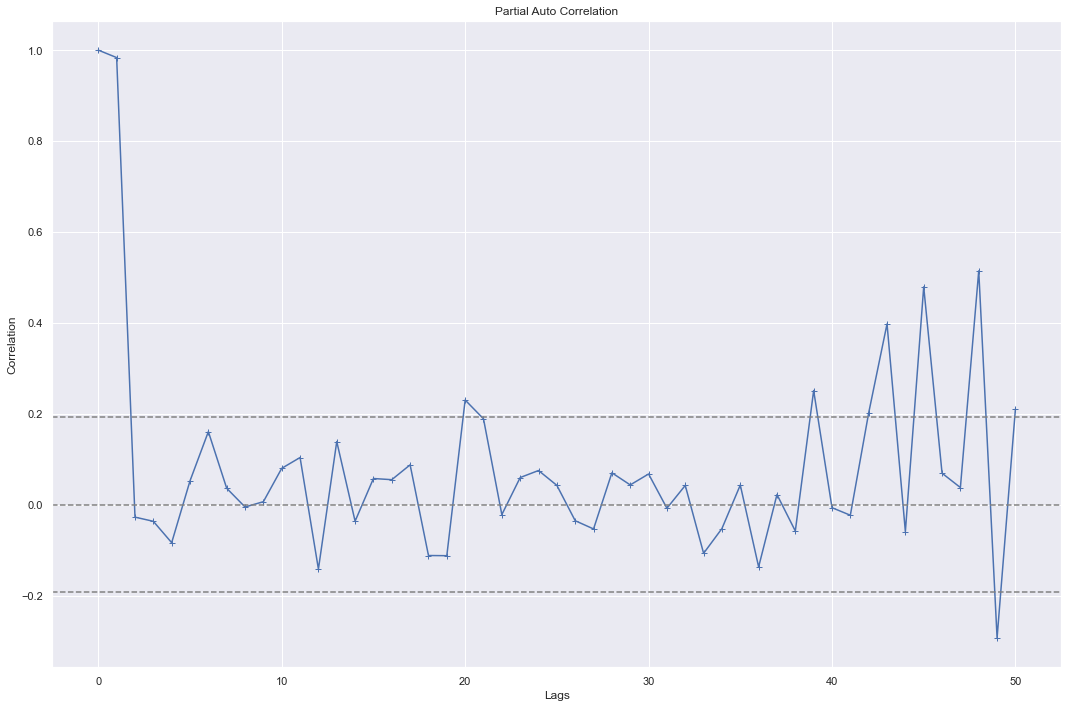

In [14]:
PACF=pacf(df['Close'], nlags=50, method='ols')

plt.plot(PACF, marker='+')
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df['Close'])), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(df['Close'])), linestyle='--', color='gray')
plt.title('Partial Auto Correlation')
plt.xlabel('Lags')
plt.ylabel('Correlation')
plt.tight_layout()
plt.show()

# AR

In [15]:
from statsmodels.tsa.arima_model import ARMA

In [16]:
ar=ARMA(df['Close'], order=(1, 0))
results=ar.fit(disp=0)

In [17]:
len(df)

104

In [18]:
pred_ar=results.predict(start=104, end=120)
print(pred_ar)

104    142.377328
105    142.106509
106    141.837525
107    141.570364
108    141.305013
109    141.041460
110    140.779693
111    140.519699
112    140.261467
113    140.004985
114    139.750241
115    139.497223
116    139.245919
117    138.996318
118    138.748408
119    138.502179
120    138.257617
dtype: float64


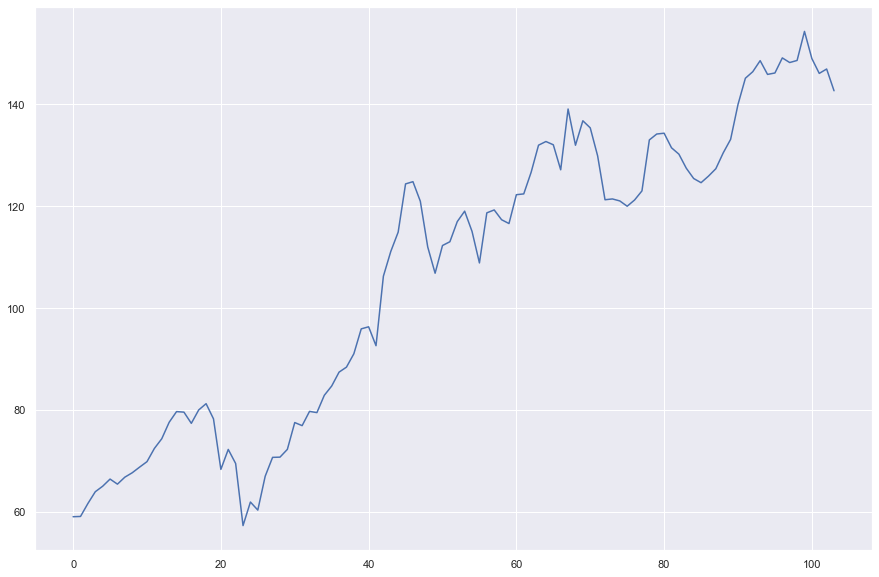

In [19]:
df['Close'].plot();
plt.show()

In [20]:
data=df['Close'].tolist()

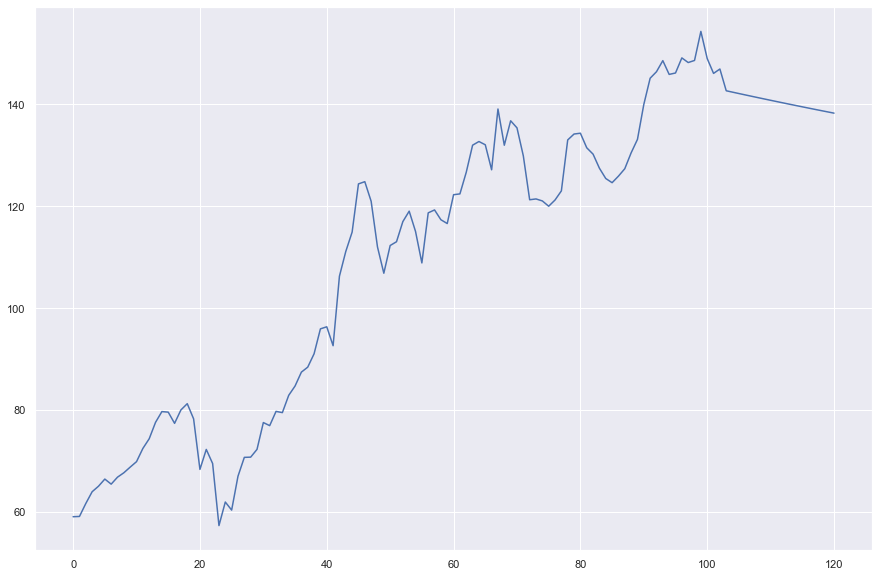

In [21]:
combined_ar=data+pred_ar.tolist()
plt.plot(combined_ar);
plt.show()

# MA

In [22]:
ma=ARMA(df['Close'], order=(0, 1))
results=ma.fit(disp=0)

In [23]:
pred_ma=results.predict(start=104, end=120)
print(pred_ma)

104    123.922581
105    106.735663
106    106.735663
107    106.735663
108    106.735663
109    106.735663
110    106.735663
111    106.735663
112    106.735663
113    106.735663
114    106.735663
115    106.735663
116    106.735663
117    106.735663
118    106.735663
119    106.735663
120    106.735663
dtype: float64


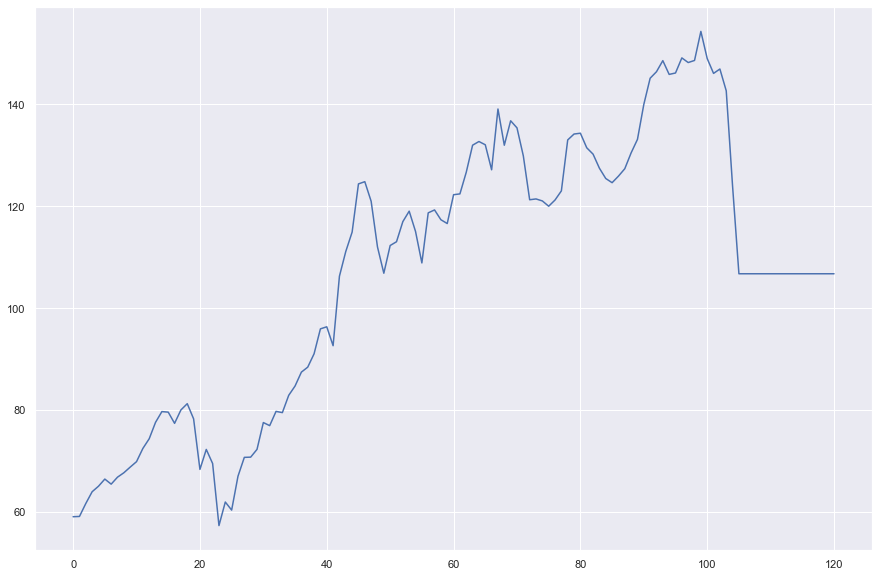

In [24]:
combined_ma=data+pred_ma.tolist()
plt.plot(combined_ma);
plt.show()

# ARIMA

In [25]:
from statsmodels.tsa.arima_model import ARIMA

In [26]:
arima=ARIMA(df['Close'], order=(1, 1, 1))
results=arima.fit(disp=0)

In [27]:
pred_arima=results.predict(start=104, end=120, typ='levels')
print(pred_arima)

104    143.173616
105    144.256118
106    144.800125
107    145.862985
108    146.425919
109    147.470543
110    148.051047
111    149.078741
112    149.675558
113    150.687535
114    151.299495
115    152.296881
116    152.922900
117    153.906740
118    154.545811
119    155.517075
120    156.168264
dtype: float64


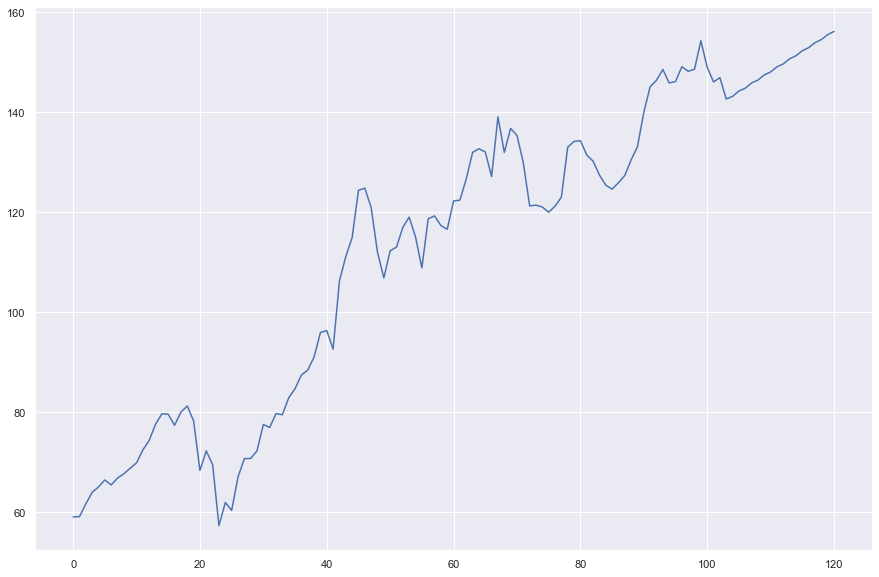

In [28]:
combined_arima=data+pred_arima.tolist()
plt.plot(combined_arima);
plt.show()

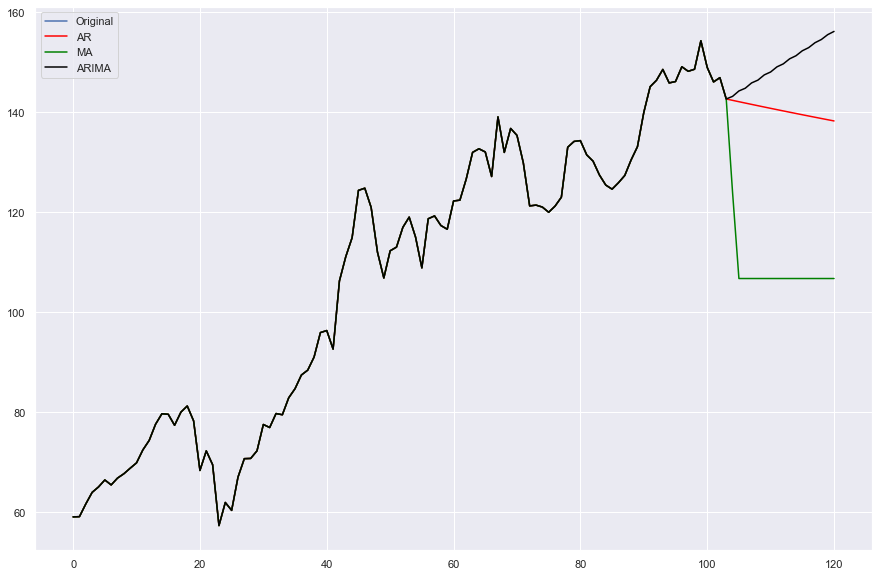

In [29]:
plt.plot(data, label='Original')
plt.plot(combined_ar, color='red', label='AR')
plt.plot(combined_ma, color='green', label='MA')
plt.plot(combined_arima, color='black', label='ARIMA')
plt.legend(loc='best')
plt.show()